In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
train=pd.read_csv("Reg_train.csv")
val=pd.read_csv("Reg_prediction.csv")

In [3]:
train.head()

,0,1,2,3,4,5,6,7,8,target
0,7.547600,0.151261,557.132466,354.008599,0.301029,55.282594,9635.211683,2.0,1.0,9461.469590
1,3.140491,0.794497,837.116189,104.515774,0.110622,88.516243,9425.041942,2.0,5.0,10257.271938
2,2.064447,0.236500,313.757354,259.127993,0.729964,88.350465,9115.661199,1.0,5.0,8719.214483
3,9.099262,0.453953,661.409826,466.070226,0.432750,21.516152,9584.310016,3.0,2.0,9165.197338
4,5.264564,0.683869,344.154511,485.441053,0.085599,90.308205,9193.271575,2.0,1.0,9458.427537


In [4]:
train.shape

(900, 10)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       900 non-null    float64
 1   1       900 non-null    float64
 2   2       900 non-null    float64
 3   3       900 non-null    float64
 4   4       900 non-null    float64
 5   5       900 non-null    float64
 6   6       900 non-null    float64
 7   7       900 non-null    float64
 8   8       900 non-null    float64
 9   target  900 non-null    float64
dtypes: float64(10)
memory usage: 70.4 KB


In [6]:
train.describe()

,0,1,2,3,4,5,6,7,8,target
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,5.036548,0.504976,493.064463,297.303826,0.507925,49.781970,9507.426024,1.973333,3.436667,9118.263873
std,2.869018,0.289803,290.436017,116.899846,0.286008,28.684840,283.069448,0.788798,1.677367,852.633238
min,0.037452,0.000942,0.969406,100.651192,0.000527,0.185411,9000.096807,1.000000,1.000000,6298.862662
25%,2.518373,0.248575,247.145068,195.239150,0.284926,25.777689,9267.721916,1.000000,2.000000,8627.098283
50%,4.944200,0.524393,497.186526,301.949065,0.501211,49.517510,9500.814515,2.000000,3.000000,9208.588416
75%,7.631981,0.753136,736.572313,399.999965,0.750584,74.538269,9751.394987,3.000000,5.000000,9713.801784
max,9.997094,0.998795,999.208515,499.174221,0.999742,99.926403,9999.499080,3.000000,6.000000,11175.834533


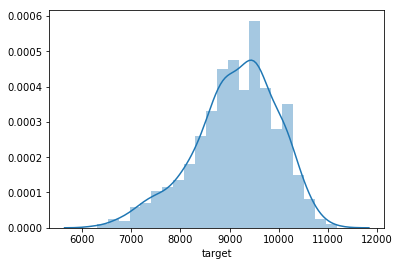

In [7]:
sns.distplot(train['target'])

## All the variables are normally distributed we can anticipate it by checking the distribution plot and statistical values.

In [8]:
x=train.drop(['target'],axis=1)
y=train['target']

In [9]:
xc=sm.add_constant(x)
lin_reg=sm.OLS(y,xc).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     480.1
Date:                Mon, 29 Jun 2020   Prob (F-statistic):               0.00
Time:                        11:37:01   Log-Likelihood:                -6554.8
No. Observations:                 900   AIC:                         1.313e+04
Df Residuals:                     890   BIC:                         1.318e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        945.6542    403.460      2.344      0.019     153.810    1737.498
0             14.6516      4.129      3.549      0.000       6.548      22.755
1            224.9913     40.911      5.500      0.000     144.698     305.284
2              1.0349      0.041     25.360      0.000       0.955       1.115
3              0.0176      0.101      0.174      0.862      -0.181       0.216
4          -1951.9405     41.593    -46.930      0.000   -2033.572   -1870.309
5              0.8310      0.416      1.999      0.046       0.015       1.647
6              0.9953      0.042     23.654      0.000       0.913       1.078
7           -523.1573     15.103    -34.640      0.000    -552.798    -493.516
8             -2.9849      7.073     -0.422      0.673     -16.866      10.896
==============================================================================
Omnibus:                       12.115   Durbin-Watson:                   2.073
Prob(Omnibus):                  0.002   Jarque-Bera (JB):                8.059
Skew:                          -0.080   Prob(JB):                       0.0178
Kurtosis:                       2.565   Cond. No.                     3.26e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.26e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## check Assumptions of linear relationship

### 1) Normality of Residuals

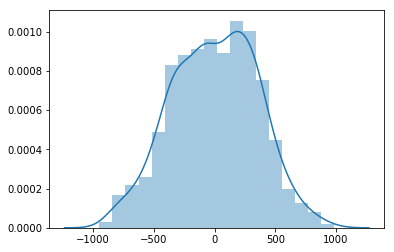

In [10]:
sns.distplot(lin_reg.resid)

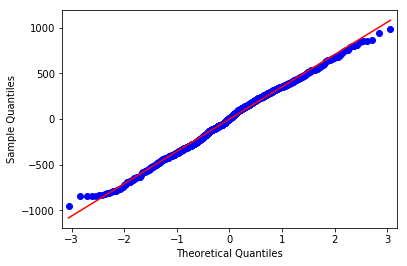

In [11]:
sm.qqplot(lin_reg.resid,line='r')
plt.show()

## multicollinearity

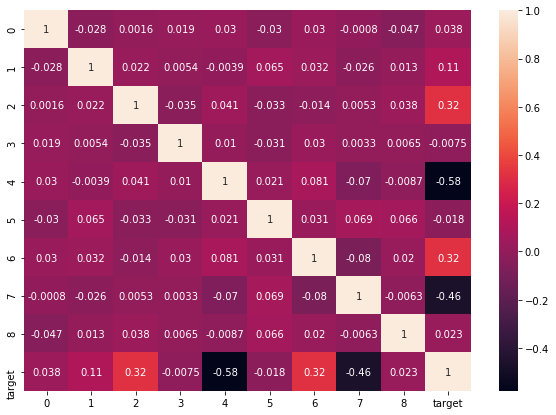

In [12]:
f=plt.figure(figsize=(10,7))
sns.heatmap(train.corr(),annot=True)

In [13]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
pd.DataFrame({'vif':vif},index=x.columns)

,vif
0,4.106728
1,4.068416
2,3.896195
3,7.488476
4,4.215027
5,4.090649
6,32.181442
7,7.224811
8,5.240815


## Variance check (Homoscedatic or Heteroscedatic)

Text(0,0.5,'Residuals')

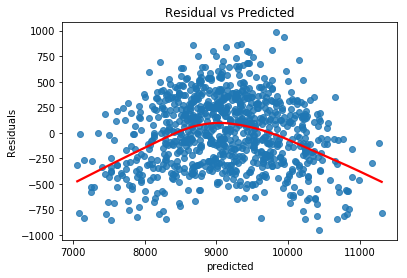

In [14]:
y_pred = lin_reg.predict()        #these give the y values on normal regression line
resids= lin_reg.resid             #these are the distance of actual y from y_pred

sns.regplot(y_pred,resids,lowess=True,line_kws={'color':'red'})
plt.title('Residual vs Predicted')
plt.xlabel('predicted')
plt.ylabel('Residuals')

In [15]:
import statsmodels.stats.api as sms
name=['F-statistic','p-value']
test=sms.het_goldfeldquandt(lin_reg.resid,lin_reg.model.exog)

test                 #x-value,probability

(0.8881300997475874, 0.8931038183016969, 'increasing')

## Autocorrelation

In [16]:
from statsmodels.stats.stattools import durbin_watson
durbin_watson(lin_reg.resid)

2.07284309276806

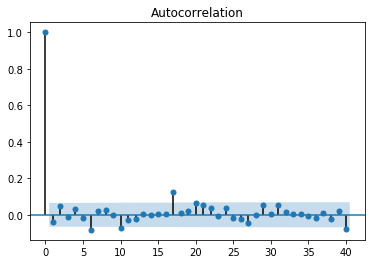

In [17]:
import statsmodels.tsa.api as smt
acf=smt.graphics.plot_acf(lin_reg.resid,lags=40)

acf.show()

## Linearity

Text(0.5,0,'observed')

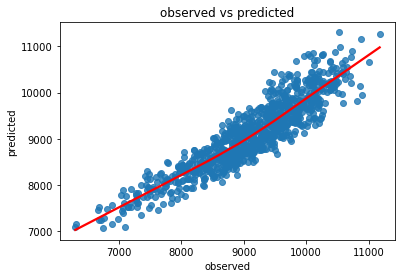

In [18]:
y_pred=lin_reg.predict()

fig,ax=plt.subplots()
sns.regplot(x=y,y=y_pred,lowess=True,line_kws={'color':'red'})
plt.title('observed vs predicted')
plt.ylabel('predicted')
plt.xlabel('observed')

### all the assumptions are satisfied and lets try to improve model accuracy .

## Model building after scaling

In [19]:
## doing data trasformation since the spread is more so,applying scaling on whole data and performing again
from sklearn.preprocessing import StandardScaler
scal=StandardScaler()

In [20]:
X=train.drop('target',axis=1)
y=train["target"]

In [21]:
X=pd.DataFrame(scal.fit_transform(X),columns=X.columns)
X.head()

,0,1,2,3,4,5,6,7,8
0,0.875717,-1.221214,0.220715,0.485341,-0.723796,0.191867,0.451680,0.033826,-1.453481
1,-0.661241,0.999585,1.185263,-1.650090,-1.389905,1.351090,-0.291200,0.033826,0.932535
2,-1.036506,-0.926922,-0.617715,-0.326750,0.776768,1.345308,-1.384758,-1.234631,0.932535
3,1.416852,-0.176156,0.579952,1.444486,-0.262989,-0.985940,0.271759,1.302282,-0.856977
4,0.079519,0.617635,-0.512997,1.610283,-1.477444,1.413596,-1.110431,0.033826,-1.453481


In [22]:
X_c=sm.add_constant(X)
lin_reg=sm.OLS(y,X_c).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     480.1
Date:                Mon, 29 Jun 2020   Prob (F-statistic):               0.00
Time:                        11:37:06   Log-Likelihood:                -6554.8
No. Observations:                 900   AIC:                         1.313e+04
Df Residuals:                     890   BIC:                         1.318e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9118.2639     11.805    772.403      0.000    9095.095    9141.433
0             42.0124     11.839      3.549      0.000      18.776      65.249
1             65.1669     11.850      5.500      0.000      41.911      88.423
2            300.3992     11.846     25.360      0.000     277.151     323.648
3              2.0611     11.828      0.174      0.862     -21.153      25.275
4           -557.9603     11.889    -46.930      0.000    -581.295    -534.626
5             23.8226     11.916      1.999      0.046       0.436      47.209
6            281.5720     11.904     23.654      0.000     258.209     304.935
7           -412.4362     11.906    -34.640      0.000    -435.804    -389.069
8             -5.0040     11.857     -0.422      0.673     -28.275      18.267
==============================================================================
Omnibus:                       12.115   Durbin-Watson:                   2.073
Prob(Omnibus):                  0.002   Jarque-Bera (JB):                8.059
Skew:                          -0.080   Prob(JB):                       0.0178
Kurtosis:                       2.565   Cond. No.                         1.19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## kfold cv to evaluate multiple models 

In [24]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
m1=LinearRegression()
m2=Ridge()
m3=Lasso()  

In [25]:
from sklearn.model_selection import KFold
from sklearn import metrics
kf=KFold(n_splits=5,shuffle=True,random_state=0)
for model,name in zip([m1,m2,m3],['Linear_Regression','Ridge','Lasso']):
    rmse=[]
    for train_idx,test_idx in kf.split(X,y):#indexes of test and train willbe stored
        Xtrain,Xtest=X.iloc[train_idx,:],X.iloc[test_idx,:]
        Ytrain,Ytest=y.iloc[train_idx],y.iloc[test_idx]
        
        model.fit(Xtrain,Ytrain)
        Y_predict=model.predict(Xtest)
        mse=metrics.mean_squared_error(Ytest,Y_predict)
        rmse.append(np.sqrt(mse))
    print(model.score(Xtrain,Ytrain))
    print('RMSE scores:%0.03f (+/-%0.5f)[%s]'%(np.mean(rmse),np.std(rmse,ddof=1),name))

0.8312727251976906
RMSE scores:358.263 (+/-4.89656)[Linear_Regression]
0.8312708026205491
RMSE scores:358.260 (+/-4.81110)[Ridge]
0.8312603884097652
RMSE scores:358.132 (+/-4.71935)[Lasso]


## Linear Regression - final model

In [37]:
V=pd.DataFrame(scal.fit_transform(val),columns=val.columns)
V.head()

,0,1,2,3,4,5,6,7,8
0,1.114656,-0.316061,0.948013,1.027295,1.209608,0.620981,-0.567493,-1.270213,0.953886
1,-1.731552,0.670148,0.546603,0.193369,-1.157275,1.415943,0.541297,-0.071899,-0.253565
2,0.224222,-0.417917,-0.962856,1.285877,-0.828877,-0.732957,1.166285,-0.071899,-0.253565
3,-0.389109,0.502806,-1.456972,-1.218282,1.238747,1.160164,-1.492190,-0.071899,0.953886
4,1.055756,-0.291519,0.013375,-0.056639,0.908485,-0.642705,1.420207,-1.270213,0.953886


In [38]:
model=LinearRegression()
model.fit(X,y)
val_pred=model.predict(V)

In [39]:
# reading the coefficient parameters
pd.DataFrame(zip(list(X.columns),list(model.coef_)), columns=["Variable","Coefficient"]).sort_values('Coefficient').style.background_gradient(cmap='coolwarm', low=0.2, high=0.2)

,Variable,Coefficient
4,4,-557.960267
7,7,-412.436196
8,8,-5.003997
3,3,2.061094
5,5,23.822621
0,0,42.012439
1,1,65.166905
6,6,281.571970
2,2,300.399246


In [41]:
val['target']=val_pred

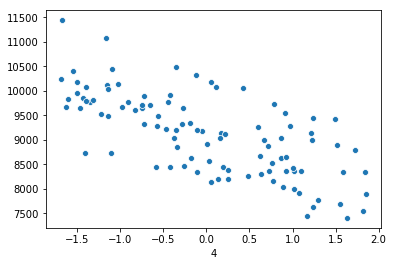

In [42]:
sns.scatterplot(V['4'],val_pred)

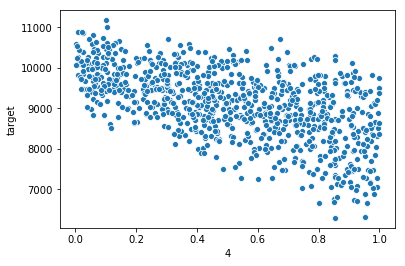

In [43]:
sns.scatterplot(train['4'],train['target'])

In [49]:
val.to_csv(r"C:\Users\bhavya.bhav\Desktop\CCTech\Reg_output.csv")